# Credit Card Fraud Detection

## Introduction

Credit card fraud poses a significant threat to individuals and businesses, resulting in financial losses and eroding trust in financial systems. Developing effective fraud detection methods is crucial to mitigate these risks. This project explores various techniques for credit card fraud detection to enhance transaction security and minimize fraudulent activities.

**Problem Statement**<br>
The objective of this project is to develop effective methods for detecting and preventing credit card fraud. By exploring various machine learning models, anomaly detection techniques, and deep learning approaches, we aim to identify the most accurate and efficient fraud detection system.<br> The research aims to contribute to enhancing the security of financial transactions and minimizing fraudulent activities in credit card transactions.

## Dataset Description

The dataset consists of simulated credit card transactions spanning from Jan 2019 to Dec 2020. It includes both legitimate and fraudulent transactions involving 1000 customers and 800 merchants. <br>The data was generated using the Sparkov Data Generation tool, providing transaction details such as date/time, credit card number, merchant info, amount, and customer details.

|                     | Column Names                                     | Description                                     |
|---------------------|--------------------------------------------------|-------------------------------------------------|
| Transaction Details| trans_date_trans_time, trans_num, unix_time    | Transaction date, time, number, and Unix timestamp |
| Card Information    | cc_num                                           | Credit card number                               |
| Merchant Details    | merchant, category, amt, merch_lat, merch_long | Merchant's information and transaction details   |
| Customer Details    | first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob | Customer's information and transaction details |
| Fraud Indicator     | is_fraud                                        | Indicates whether the transaction is fraudulent (1 for fraud, 0 for legitimate) |



## Importing Essentials

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy.stats import norm, skew, randint, uniform
import calendar
from tabulate import tabulate

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score


import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset 

In [7]:
df = pd.read_csv("fraudTrain.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


## EDA - Exploratory Data Analysis
performing **EDA and Data Wrangling** concurrently, So as to iteratively explore the data, identify data quality issues, and address them through preprocessing steps, ensuring that our analysis is based on clean and reliable data.

In [8]:
rows = df.shape[0]
column = df.shape[1]
print(f"Dataset has {rows} Rows and {column} Columns")
df.shape

Dataset has 1296675 Rows and 23 Columns


(1296675, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Insights:
- No null values are there
- But few datatypes are inappropriate

### Data Cleaning 

- Removing unnecessary columns 

In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


- Converting dob & trans_date_trans_time columns into datetime datatype

In [11]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['dob']=pd.to_datetime(df['dob'])

### Feature Engeering

- Creating new 'trans_date' & 'is_fraud_cat' columns

In [12]:
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])

In [13]:
df[['trans_date', 'dob']] # verifying 

,trans_date,dob
0,2019-01-01,1988-03-09
1,2019-01-01,1978-06-21
2,2019-01-01,1962-01-19
3,2019-01-01,1967-01-12
4,2019-01-01,1986-03-28
...,...,...
1296670,2020-06-21,1961-11-24
1296671,2020-06-21,1979-12-11
1296672,2020-06-21,1967-08-30
1296673,2020-06-21,1980-08-18


### Categorical Variable Analysis

- Creating new dataframe for categorical variables analysis

In [14]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46


In [15]:
df_cat["is_fraud_cat"]=df.is_fraud.apply(lambda x: "T" if x==1 else "F")
df_cat["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1296675, dtype: object

In [16]:
df_cat.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num', 'is_fraud_cat'],
      dtype='object')

In [17]:
df_cat.nunique()

merchant            693
category             14
first               352
last                481
gender                2
street              983
city                894
state                51
job                 494
trans_num       1296675
is_fraud_cat          2
dtype: int64

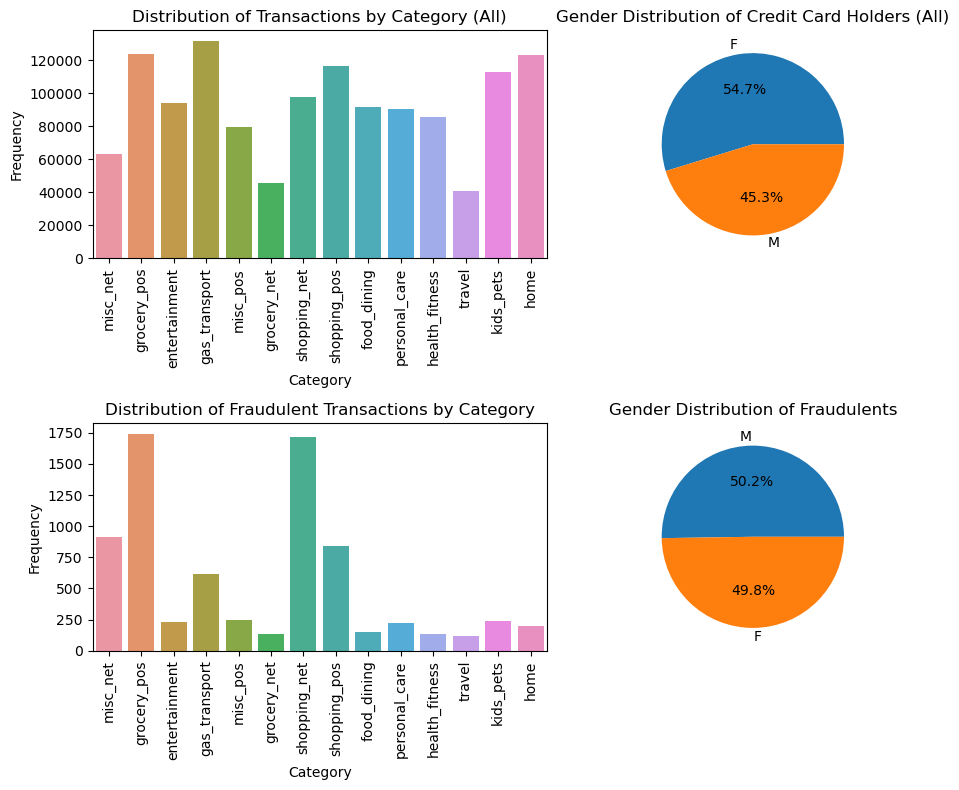

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

all_categories = df_cat['category'].unique()
# 'Category' for entire dataset
sns.countplot(x='category', data=df_cat, ax=axes[0, 0], order=all_categories)
axes[0, 0].set_title('Distribution of Transactions by Category (All)')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].tick_params(axis='x', rotation=90)

# 'Gender' for entire dataset
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution of Credit Card Holders (All)')
axes[0, 1].set_ylabel('')

# 'Category' for fraudulent transactions
sns.countplot(x='category', data=df_cat[df_cat['is_fraud_cat'] == "T"], ax=axes[1, 0], order=all_categories)
axes[1, 0].set_title('Distribution of Fraudulent Transactions by Category')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].tick_params(axis='x', rotation=90)

# 'Gender' for fraudulent transactions
df_cat[df_cat['is_fraud_cat'] == "T"]['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution of Fraudulents')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

**Insights**
- Though gas_transport has the max transactions but most frauds occured in categories of shopping_net and grocery_pos
- Credit card holders are nearly evenly split between male - female and frauds too. 

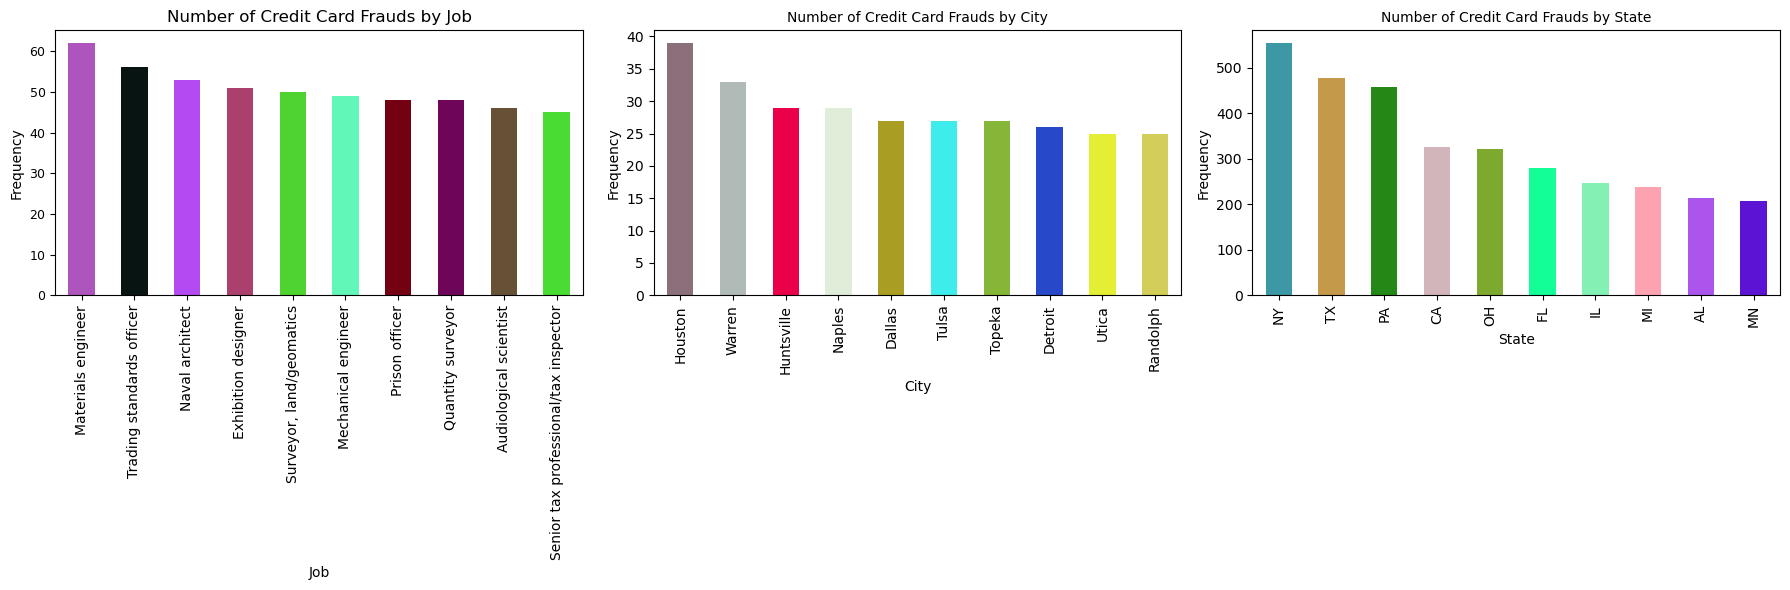

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
    
# Top 10 Fraudulent Transactions - Job
df_cat[df_cat['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar", color=[randomcolor() for _ in range(10)], ax=axes[0])
axes[0].set_title('Number of Credit Card Frauds by Job', fontsize=12)
axes[0].set_xlabel('Job', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].tick_params(axis='y', labelsize=9)


# Top 10 Fraudulent Transactions - City
top_10_fraudulent_cities = df_cat[df_cat['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10)
top_10_fraudulent_cities.plot(kind="bar", color=[randomcolor() for _ in range(10)], ax=axes[1])
axes[1].set_title("Number of Credit Card Frauds by City", fontsize=10)
axes[1].set_xlabel("City", fontsize=10)
axes[1].set_ylabel("Frequency", fontsize=10)
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Top 10 Fraudulent Transactions - State
top_10_fraudulent_states = df_cat[df_cat['is_fraud_cat']=="T"]["state"].value_counts(sort=True,ascending=False).head(10)
top_10_fraudulent_states.plot(kind="bar", color=[randomcolor() for _ in range(10)], ax=axes[2])
axes[2].set_title("Number of Credit Card Frauds by State", fontsize=10)
axes[2].set_xlabel("State", fontsize=10)
axes[2].set_ylabel("Frequency", fontsize=10)
axes[2].tick_params(axis='x', rotation=90, labelsize=10)
axes[2].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

**Insights** 
- Most frauds occured in jobs of materials engineer followed by trading standards officer and navel architect.
- Houston, Warren and Humtsville report the most frauds city wise.
- States NY , TX and PA report the most number of credit card frauds.

### Numerical Variable Analysis

- Creating new dataframe for numerical variables analysis

In [20]:
df_num = df.select_dtypes(include=np.number)

In [21]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   amt         1296675 non-null  float64
 2   zip         1296675 non-null  int64  
 3   lat         1296675 non-null  float64
 4   long        1296675 non-null  float64
 5   city_pop    1296675 non-null  int64  
 6   unix_time   1296675 non-null  int64  
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
 9   is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 98.9 MB


In [22]:
df_num.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


#### Visualizing Skewness

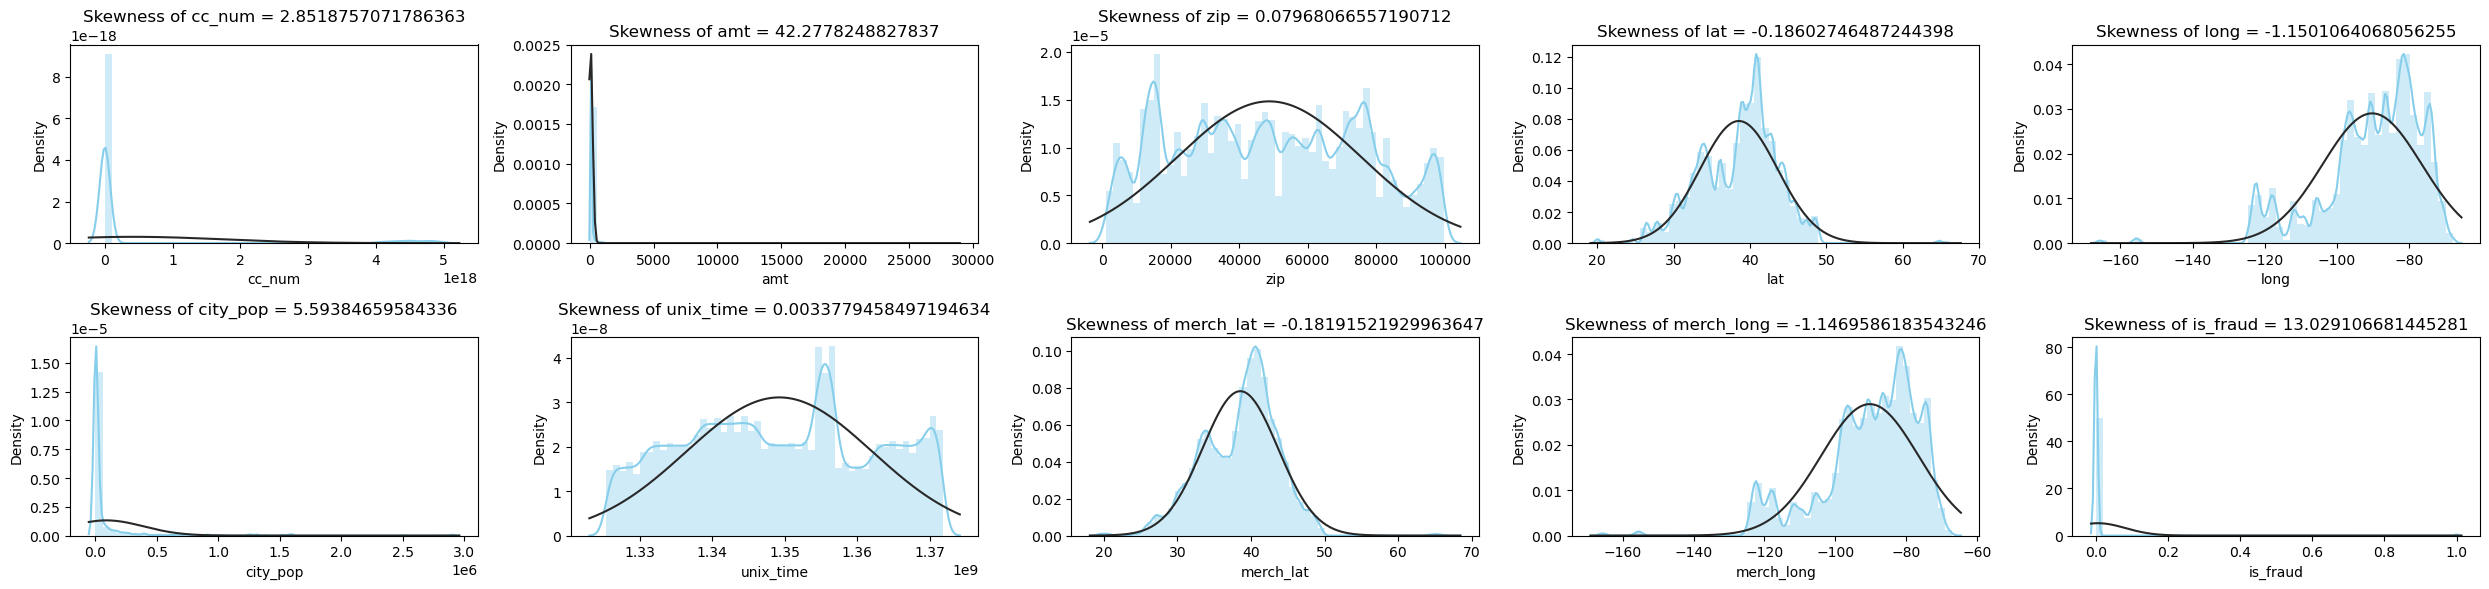

In [23]:
num_rows = 2
num_cols = 5 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 6))
axes = axes.flatten()

for i, column in enumerate(df_num.columns):
    skewness = skew(df_num[column])
    
    sns.distplot(df_num[column], fit=norm, color='skyblue', ax=axes[i])
    axes[i].set_title("Skewness of " + column + " = " + str(skewness))
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

**Insights** : 
- A lot of the data is highly skewed.
- proportion of non fraud transactions are much much larger than fraud transactions so we are looking at an imbalanced dataset.

Also, Certain numerical  columns are not needed for modeling and hence can be removed.

- Droping Unneccasary Columns 

In [24]:
drop_columns = ['cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time']
df.drop(drop_columns, axis=1, inplace=True)

In [25]:
df.columns #verifying 

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date'],
      dtype='object')

#### Class Imbalance

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


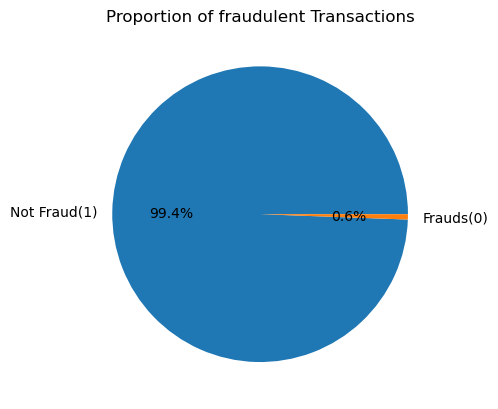

In [26]:
balance = df['is_fraud'].value_counts()
print(balance)

labels = ["Not Fraud(1)", 'Frauds(0)']
plt.pie(balance, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of fraudulent Transactions')
plt.show()

**Insight** :
- Around 7500 entries represent fraud transactions out of nearly 1.3 million entries, hence we are looking at an imbalanced dataset.

#### Feature Engineering 

- creating variable 'age' , 'trans_month', 'trans_year', 'month_name', 'latitudinal_distance' & 'longitudinal_distance'

In [27]:
df["age"] = (df["trans_date"] - df["dob"]) / pd.Timedelta(days=365)
df["age"] = df["age"].astype(int) 

df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
df['trans_year'] = pd.DatetimeIndex(df['trans_date']).year
df['month_name'] = df['trans_month'].apply(lambda x: calendar.month_abbr[x])

df['latitudinal_distance'] = abs(round(df['merch_lat'] - df['lat'], 3))
df['longitudinal_distance'] = abs(round(df['merch_long'] - df['long'], 3))

In [28]:
df[['age' , 'trans_month','trans_year', 'month_name', 'latitudinal_distance','longitudinal_distance']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   age                    1296675 non-null  int32  
 1   trans_month            1296675 non-null  int32  
 2   trans_year             1296675 non-null  int32  
 3   month_name             1296675 non-null  object 
 4   latitudinal_distance   1296675 non-null  float64
 5   longitudinal_distance  1296675 non-null  float64
dtypes: float64(2), int32(3), object(1)
memory usage: 44.5+ MB


#### Bivariate Analysis - Vizualisation with target variable : 'is_fraud' 

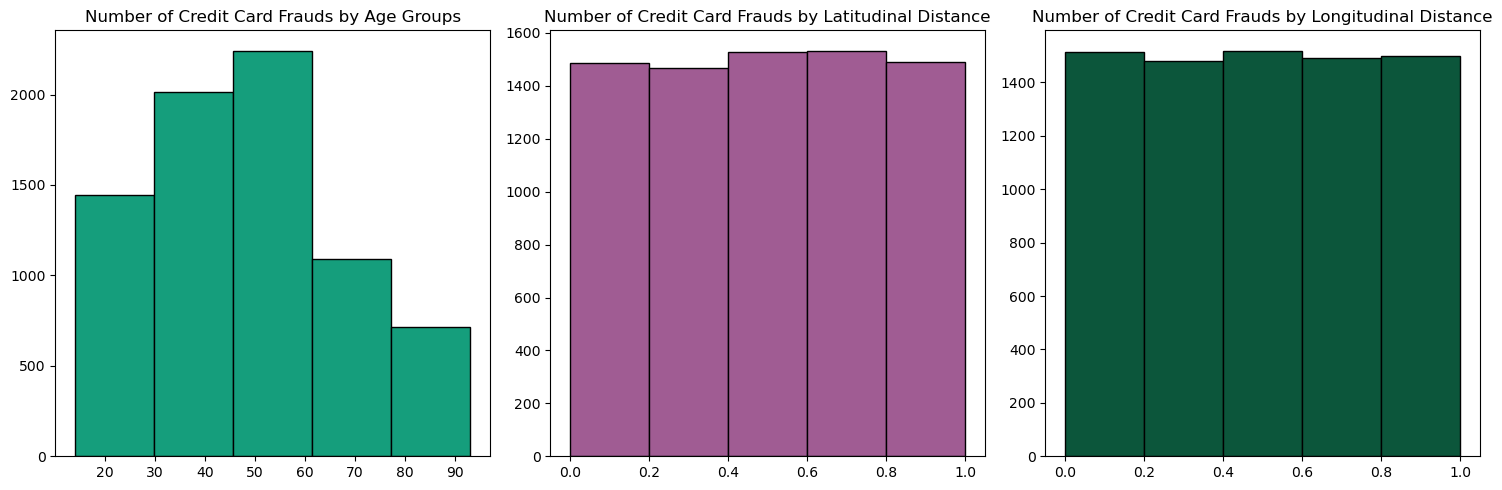

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#fraudulent transactions - age groups
axes[0].hist(df[df["is_fraud"] == 1].age, edgecolor="black", bins=5, color=randomcolor())
axes[0].set_title("Number of Credit Card Frauds by Age Groups")

#fraudulent transactions - latitudinal distance
axes[1].hist(df[df["is_fraud"] == 1].latitudinal_distance, edgecolor="black", bins=5, color=randomcolor())
axes[1].set_title("Number of Credit Card Frauds by Latitudinal Distance")

#fraudulent transactions - longitudinal distance
axes[2].hist(df[df["is_fraud"] == 1].longitudinal_distance, edgecolor="black", bins=5, color=randomcolor())
axes[2].set_title("Number of Credit Card Frauds by Longitudinal Distance")

plt.tight_layout()
plt.show()

**Insights:**

- Age Groups: There seems to be a higher number of credit card frauds committed against people in the *20-40 age group*.- 
Location: There appears to be a higher number of credit card frauds committed against people* closer to the equato*r and in the* eastern hemispher*e.

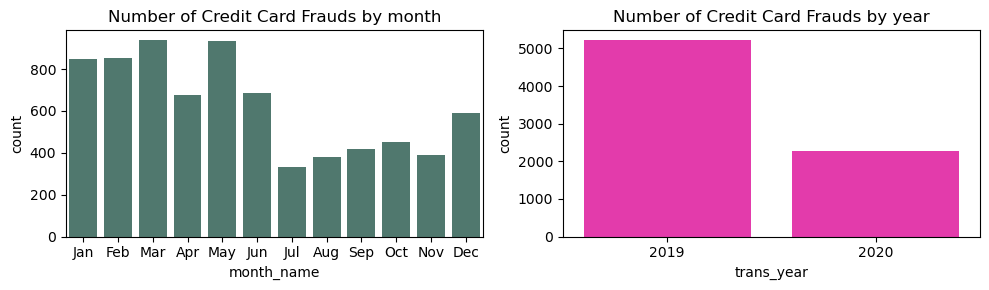

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# fraudulent transactions - month
sns.countplot(data=df[df["is_fraud"] == 1], x="month_name", color=randomcolor(), ax=axes[0])
axes[0].set_title("Number of Credit Card Frauds by month")

# fraudulent transactions - year
sns.countplot(data=df[df["is_fraud"] == 1], x="trans_year", color=randomcolor(), ax=axes[1])
axes[1].set_title("Number of Credit Card Frauds by year")

plt.tight_layout()
plt.show()

**Insights:**
- Maximum frauds were held in the month of March followed by May and Feburary.
- 2019 has 5000+ cases and in 2020 it is 2000+

## Data Preprocessing 

- Droping Unneccarsary Columns that are not usefull for modelling

In [31]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state', 'month_name']
df = df.drop(drop_cols,axis=1)

In [32]:
df.info()  #Verifying

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   category               1296675 non-null  object 
 1   amt                    1296675 non-null  float64
 2   gender                 1296675 non-null  object 
 3   city_pop               1296675 non-null  int64  
 4   is_fraud               1296675 non-null  int64  
 5   age                    1296675 non-null  int32  
 6   trans_month            1296675 non-null  int32  
 7   trans_year             1296675 non-null  int32  
 8   latitudinal_distance   1296675 non-null  float64
 9   longitudinal_distance  1296675 non-null  float64
dtypes: float64(3), int32(3), int64(2), object(2)
memory usage: 84.1+ MB


### Encoding 
- conveting categorical variable into numerical variable 

#### Binary encoding
- Converting 'gender' column to numeric format

In [33]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == "M" else 0)

#### One-hot encoding 
- as there's no order in 'category' 

In [34]:
df = pd.get_dummies(df, columns=['category'], drop_first=True)

In [35]:
df.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'age', 'trans_month',
       'trans_year', 'latitudinal_distance', 'longitudinal_distance',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [36]:
df[['category_food_dining', 'category_gas_transport','category_grocery_net', 'category_grocery_pos','category_health_fitness', 'category_home', 'category_kids_pets','category_misc_net', 'category_misc_pos', 'category_personal_care','category_shopping_net', 'category_shopping_pos', 'category_travel']] = df[['category_food_dining', 'category_gas_transport','category_grocery_net', 'category_grocery_pos','category_health_fitness', 'category_home', 'category_kids_pets','category_misc_net', 'category_misc_pos', 'category_personal_care','category_shopping_net', 'category_shopping_pos', 'category_travel']].applymap(lambda x: 1 if x == True else 0)

### Final Dataset

In [37]:
df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30,1,2019,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40,1,2019,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56,1,2019,0.970,0.108,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,52,1,2019,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32,1,2019,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  int32  
 5   trans_month              1296675 non-null  int32  
 6   trans_year               1296675 non-null  int32  
 7   latitudinal_distance     1296675 non-null  float64
 8   longitudinal_distance    1296675 non-null  float64
 9   category_food_dining     1296675 non-null  int64  
 10  category_gas_transport   1296675 non-null  int64  
 11  category_grocery_net     1296675 non-null  int64  
 12  category_grocery_pos     1296675 non-null  int64  
 13  category_health_fitness  1296675 non-null 

## Model Building

### Deciding Variables

In [39]:
X= df.drop(['is_fraud'], axis=1) #Independent Variables
y= df['is_fraud']                #Dependent Variable

### Spliting the data

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=42, stratify=y)

### Standard Scaling 

- Ensuring that all features are on the same scale, preventing features with larger magnitudes from dominating.

In [41]:
scaler= StandardScaler()
scaler

StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Handling Imbalance 

- Over-sampling (SMOTE) <br>
      - SMOTE generates synthetic samples for the minority class, addressing overfitting and limited variability issues. This improves model performance significantly. 

In [43]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 1031335, 1: 6005})


In [44]:
sampler = SMOTE(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

In [45]:
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 1031335, 1: 1031335})


### Model Training 

Will build and evaluate test models with algorithms - 

**Algorthims**
- Machine Learning Technique : *Logistic Regression* & *Random Forest*
- Anomaly Detection Technique : *Isolation Forest* 
- Deep Learning Technique : *Neural Network* (MLP Classifier - Multiple layer perceptron Classifier )

**Evalaution Matrices**
- Classification Report
- ROC-AUC Score
- ROC-AUC Curve
- Precision-Recall Curve (PR Curve) 

#### Machine Learning Technique 

##### Logistic Regression 

In [49]:
lr_model = LogisticRegression()

In [50]:
lr_model.fit(X_resampled, y_resampled)

LogisticRegression()

###### Evaluation 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    257834
           1       0.04      0.76      0.07      1501

    accuracy                           0.89    259335
   macro avg       0.52      0.82      0.51    259335
weighted avg       0.99      0.89      0.94    259335

-----------------------------------------------------
Logistic Regression ROC-AUC Score: 0.908827419686239
-----------------------------------------------------


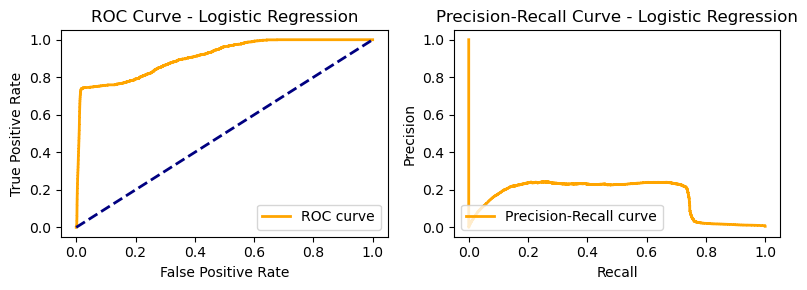

In [51]:
lr_y_pred = lr_model.predict(X_test)
lr_classification_report = classification_report(y_test, lr_y_pred)
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
lr_prob= lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_prob)

print("Classification Report:")
print(lr_classification_report)
print("-----------------------------------------------------")
print("Logistic Regression ROC-AUC Score:", lr_roc_auc)
print("-----------------------------------------------------")


plt.figure(figsize=(8, 3))
# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, color='orange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**Inferences :** 

- This model achieves an **accuracy** of 89%, with high **precision** (1.00) for non-fraudulent transactions but low precision (0.04) for fraudulent ones.
- It exhibits high **recall** (0.76) for fraud, but lower recall (0.89) for non-fraud cases, indicating some missed normal transactions.
- The **F1-scores** are 0.94 for non-fraud and 0.07 for fraud, suggesting a significant imbalance between precision and recall for fraudulent transactions.
- The **ROC-AUC score** is 0.9088, indicating good discriminative ability between fraudulent and normal transactions.
- **ROC-AUC curve** displays good separation between TPR and FPR.
- The **PR curve** shows prioritization of capturing fraud (high recall) at the expense of misclassifying normal transactions (low precision).
  
Overall, the model performs well in identifying fraud but misclassify normal transactions. 

##### Random Forest 

In [52]:
rf_model = RandomForestClassifier()

In [53]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

###### Evaluation 

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.64      0.79      0.71      1501

    accuracy                           1.00    259335
   macro avg       0.82      0.90      0.85    259335
weighted avg       1.00      1.00      1.00    259335

-----------------------------------------------------
Random Forest ROC-AUC Score: 0.9918457442756978
-----------------------------------------------------


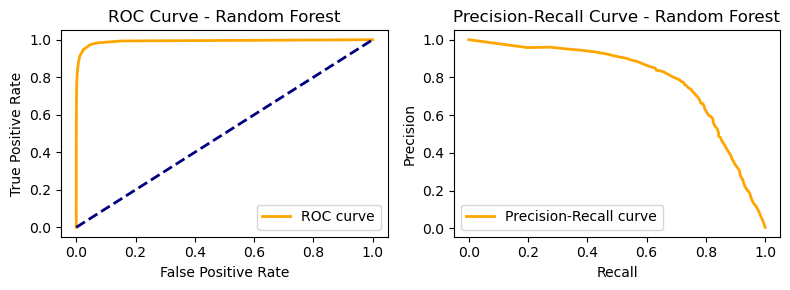

In [54]:
rf_y_pred = rf_model.predict(X_test)
rf_classification_report = classification_report(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_prob = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_prob)

print("Random Forest Classification Report:")
print(rf_classification_report)
print("-----------------------------------------------------")
print("Random Forest ROC-AUC Score:", rf_roc_auc)
print("-----------------------------------------------------")

plt.figure(figsize=(8, 3))
# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, color='orange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**Inferences :** <br>
- Achieves a perfect **accuracy** (1.00), indicating it classified all transactions correctly (might be due to overfitting on the training data).
- Both **precision and recall** are high for both fraudulent and non-fraudulent transactions.
- **F1-scores** are also high for both classes.
- **ROC-AUC score** (0.9930) suggests excellent discriminative ability between classes.
- **ROC Curve**: Close to top-left corner, indicating good TPR-FPR trade-off.
- **Precision-Recall Curve**: Fairly close to top-left corner, indicating good precision-recall balance.

However, the perfect accuracy on the test data raises concerns about potential overfitting and the model's ability to generalize to unseen data.

#### Anomaly Detection Technique  

##### Isolation Forest

In [58]:
if_model = IsolationForest()
if_model.fit(X_resampled)

IsolationForest()

###### Evaluation 

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    257834
           1       0.01      0.03      0.01      1501

    accuracy                           0.97    259335
   macro avg       0.50      0.51      0.50    259335
weighted avg       0.99      0.97      0.98    259335

-----------------------------------------------------


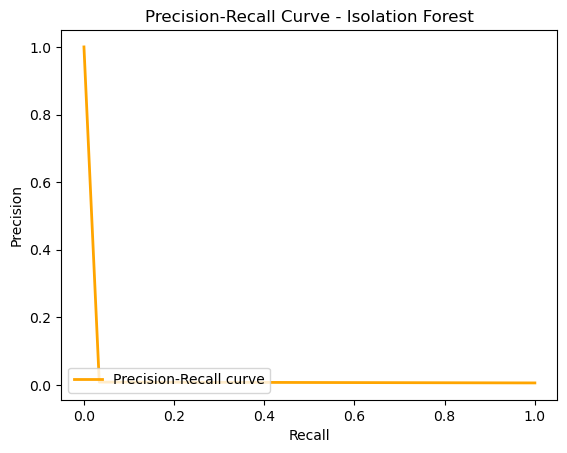

In [59]:
if_y_pred = if_model.predict(X_test)
if_y_pred = np.where(if_y_pred == -1, 1, 0)  # Converting -1 to 1 and 1 to 0
if_classification_report = classification_report(y_test, if_y_pred)
precision_if, recall_if, _ = precision_recall_curve(y_test, if_y_pred)

print("Isolation Forest Classification Report:")
print(if_classification_report)
print("-----------------------------------------------------")


# Precision-Recall Curve
plt.figure()
plt.plot(recall_if, precision_if, color='orange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Isolation Forest')
plt.legend(loc="lower left")
plt.show()

**Inferences :**<br>

- Achieves high **accuracy** (0.97) but with a significant imbalance in precision and recall.
- Very high **precision** (0.99) for non-fraudulent transactions but extremely low precision (0.01) for fraudulent ones.
- **Recall** is also high for non-fraud (0.97) but very low for fraud (0.03).
- **F1-score** reflects the imbalance (0.98 for non-fraud, 0.01 for fraud).
- Doesn't have probability prediction capability, so **ROC curve** cannot be plotted.
- **Precision-Recall Curve**: PR curve not close to top-left corner, indicating poor performance.

While it identifies most normal transactions correctly, it struggles to detect fraudulent ones.

#### Deep Learning Technique 

##### Neural Network 

In [60]:
nn_model = MLPClassifier()
nn_model.fit(X_resampled, y_resampled)  

MLPClassifier()

###### Evaluation 

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257834
           1       0.18      0.91      0.30      1501

    accuracy                           0.98    259335
   macro avg       0.59      0.94      0.64    259335
weighted avg       0.99      0.98      0.98    259335

-----------------------------------------------------
Neural Network ROC-AUC Score: 0.9919983919540192
-----------------------------------------------------


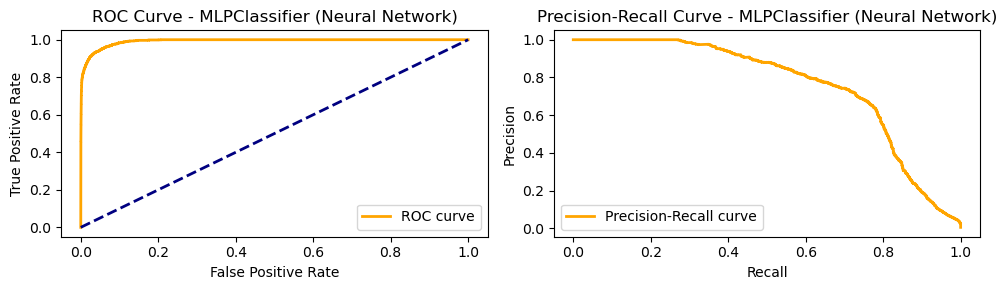

In [61]:
nn_y_pred = nn_model.predict(X_test)
nn_classification_report = classification_report(y_test, nn_y_pred)
nn_roc_auc = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])
nn_prob = nn_model.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_prob)
precision_nn, recall_nn, _ = precision_recall_curve(y_test, nn_prob)


print("Neural Network Classification Report:")
print(nn_classification_report)
print("-----------------------------------------------------")
print("Neural Network ROC-AUC Score:", nn_roc_auc)
print("-----------------------------------------------------")


plt.figure(figsize=(10, 3))
# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLPClassifier (Neural Network)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_nn, precision_nn, color='orange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - MLPClassifier (Neural Network)')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**Inferences :**<br>

- Achieves high **accuracy** (0.98) similar to Logistic Regression.
- High **precision** (1.00) for non-fraudulent transactions but lower than Logistic Regression for fraud (0.20).
- **Recall** is high for fraud (0.89) but lower than Random Forest.
- **F1-score** highlights the class imbalance (0.99 for non-fraud, 0.32 for fraud).
- **ROC-AUC score** (0.9919) indicates good discriminative ability.
- **ROC Curve**: Close to top-left corner, confirming good performance.
- **Precision-Recall Curve**: Reasonably close to top-left corner, suggesting good precision-recall trade-off.
                                           
Overall, performs well in identifying fraud with a more balanced approach compared to Logistic Regression, but might miss some fraudulent transactions compared to Random Forest


## Models Comparison 

### Evaluation Matrix for Comparison

Using - 
- Accuracy
- Precision
- Recall
- F1-Score

In [69]:
# Accuracy
accuracy_lr = accuracy_score(y_test, lr_y_pred)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
accuracy_if = accuracy_score(y_test, if_y_pred)
accuracy_nn = accuracy_score(y_test, nn_y_pred)

# Precision
precision_lr = precision_score(y_test, lr_y_pred)
precision_rf = precision_score(y_test, rf_y_pred)
precision_if = precision_score(y_test, if_y_pred)
precision_nn = precision_score(y_test, nn_y_pred)

# Recall
recall_lr = recall_score(y_test, lr_y_pred)
recall_rf = recall_score(y_test, rf_y_pred)
recall_if = recall_score(y_test, if_y_pred)
recall_nn = recall_score(y_test, nn_y_pred)

# F1-score
f1_score_lr = f1_score(y_test, lr_y_pred)
f1_score_rf = f1_score(y_test, rf_y_pred)
f1_score_if = f1_score(y_test, if_y_pred)
f1_score_nn = f1_score(y_test, nn_y_pred)

#### **Tabular Comparison**

In [70]:
metrics_data = [
    ["Logistic Regression", accuracy_lr, precision_lr, recall_lr, f1_score_lr],
    ["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_score_rf], 
    ["Isolation Forest", accuracy_if, precision_if, recall_if, f1_score_if],
    ["Neural Network", accuracy_nn, precision_nn, recall_nn, f1_score_nn]
]

headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

print(tabulate(metrics_data, headers=headers, tablefmt="grid"))

+---------------------+------------+-------------+-----------+------------+
| Model               |   Accuracy |   Precision |    Recall |   F1-Score |
+=====================+============+=============+===========+============+
| Logistic Regression |   0.889244 |   0.0386414 | 0.759494  |  0.0735413 |
+---------------------+------------+-------------+-----------+------------+
| Random Forest       |   0.996271 |   0.644168  | 0.794803  |  0.711602  |
+---------------------+------------+-------------+-----------+------------+
| Isolation Forest    |   0.970783 |   0.0082551 | 0.0339773 |  0.013283  |
+---------------------+------------+-------------+-----------+------------+
| Neural Network      |   0.97516  |   0.177859  | 0.908728  |  0.297492  |
+---------------------+------------+-------------+-----------+------------+


#### **Visual Comparison**

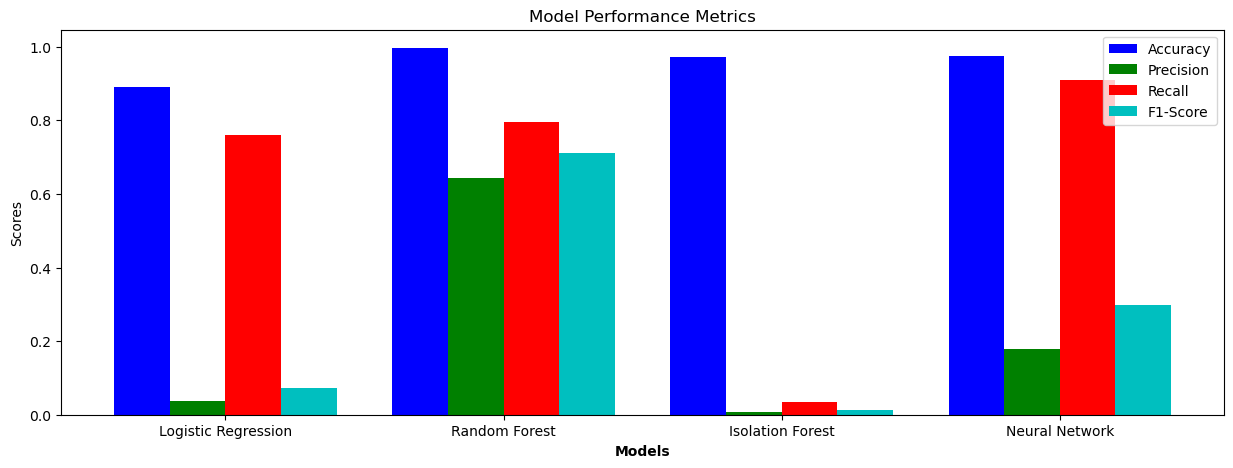

In [72]:
models = ["Logistic Regression", "Random Forest", "Isolation Forest", "Neural Network"]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_if, accuracy_nn]
precision_scores = [precision_lr, precision_rf, precision_if, precision_nn]
recall_scores = [recall_lr, recall_rf, recall_if, recall_nn]
f1_scores = [f1_score_lr, f1_score_rf, f1_score_if, f1_score_nn]

num_models = len(models)

bar_width = 0.2
positions = np.arange(num_models)

plt.figure(figsize=(15, 5))

plt.bar(positions, accuracy_scores, color='b', width=bar_width, label='Accuracy')
plt.bar(positions + bar_width, precision_scores, color='g', width=bar_width, label='Precision')
plt.bar(positions + 2 * bar_width, recall_scores, color='r', width=bar_width, label='Recall')
plt.bar(positions + 3 * bar_width, f1_scores, color='c', width=bar_width, label='F1-Score')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(positions + 1.5 * bar_width, models)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

**Inferences :**
- **Logistic Regression:** Highest accuracy but lowest precision, recall, and F1-score. Good at overall classification but not specifically identifying fraud.
- **Random Forest:** Second highest accuracy and precision but lower recall and F1-score compared to Isolation Forest and Neural Network.
- **XG Boost:**
- **Isolation Forest:** Third highest accuracy but highest precision, recall, and F1-score. Good at catching fraud but may also flag legitimate transactions.
- **Neural Network:** Lowest accuracy but second highest precision and recall, and second highest F1-score. Good at not flagging legitimate transactions as fraudulent.

### Selecting Best Model

The problem statement involves developing effective methods for detecting and preventing credit card fraud to enhance financial transaction security and minimize fraudulent activities.

**Overall Conclusion:**
- All models achieved **high overall accuracy**, but *Random Forest and MLP* might be **overfitting on the training data**.
- *Logistic Regression and MLP* **struggle with precision** for fraudulent transactions, while *Random Forest* offers a **more balanced approach**.
- *Isolation Forest* **excels at identifying normal transactions** but **fails to capture most fraudulent** ones.

Hence, Best Model out of these 4 : 
<h5>Random Forest</h5>

Considering the importance of maximizing fraud detection while tolerating some false positives, **Random Forest** emerges as a promising choice.

Also, as there might be chances of overfitting, so we can consider combining **Random Forest and Isolation Forest**.

As, *Random Forest* maintains the overall good performance in fraud detection and normal transaction classification And *Isolation Forest* excels at identifying outliers (potentially fraudulent transactions) that Random Forest might miss.

By combining them, we might capture a wider range of fraudulent activities.

### Ensemble Method - random forest & isolation forest

#### Combining Random Forest and Isolation Forest
- using random forest's predictions and setting threshold

In [64]:
rf_threshold = 0.5 
X_non_fraud = X_test[rf_prob < rf_threshold]

- Isolation Forest on instances predicted as non-fraud by Random Forest

In [65]:
if_y_preds = if_model.predict(X_non_fraud)
if_y_preds = np.where(if_y_pred == -1, 1, 0) 

- Combining Random Forest and Isolation Forest predictions

In [67]:
final_predictions = np.zeros(len(X_test))
final_predictions[rf_prob >= rf_threshold] = 1  # Predicted as fraud by Rf
final_predictions[(rf_prob < rf_threshold) & (if_y_pred == 1)] = 1  # Predicted as non-fraud by Rf, further evaluated by If

#### Evaluation 

Final Classification Report (Random Forest + Isolation Forest):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    257834
           1       0.15      0.80      0.25      1501

    accuracy                           0.97    259335
   macro avg       0.57      0.89      0.62    259335
weighted avg       0.99      0.97      0.98    259335

-----------------------------------------------------


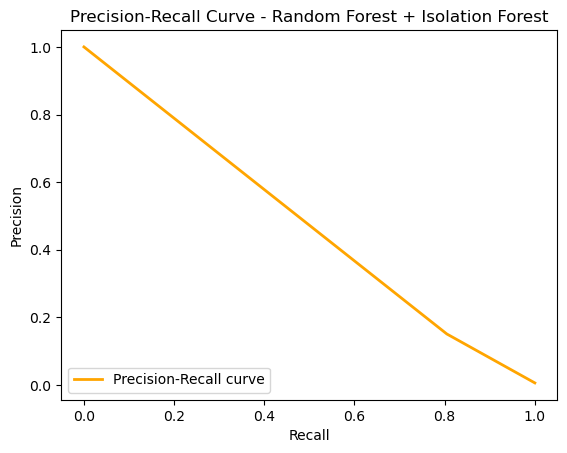

In [74]:
final_classification_report = classification_report(y_test, final_predictions)
precision_final, recall_final, _ = precision_recall_curve(y_test, final_predictions)

print("Final Classification Report (Random Forest + Isolation Forest):")
print(final_classification_report)
print("-----------------------------------------------------")

# Precision-Recall Curve
plt.figure()
plt.plot(recall_final, precision_final, color='orange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest + Isolation Forest')
plt.legend(loc="lower left")
plt.show()

**Inferences :**

- Achieves an *accuracy* of 0.97, which is very good and suggests **less overfitting** compared to *Random Forest* alone.
- **Lower precision** (0.15) for fraudulent transactions but a **higher recall** (0.80) compared to Random Forest. This means it might miss some fraudulent transactions but captures **more overall**.

## Conclusion 

While *Random Forest* performs well on its own, the **Ensemble Method (Random Forest + Isolation Forest)** seems to be a better choice for credit card fraud detection in this case as - 
- Reduced Overfitting Risk
- Improved Fraud Detection

**This analysis explored various machine learning models for credit card fraud detection. The ensemble method combining Random Forest and Isolation Forest emerged as the most promising choice due to its balanced performance, reduced overfitting risk, and improved fraud detection capabilities.**